Decision making under uncertainty – create a quantitative investment strategy
Write a script to apply a strategy (define allocations by hour/day/week/month), and another one to conduct post-trade calculations to calculate P&L and risk (realized/unrealized drawdown)
1) program a trading strategy: try to profit on good news - if open/previous close-1 >
x1%, buy at open, sell at x2% higher, or at the close; calculate profit and drawdown
2) find parameters x1 and x2, for which profit is maximal
3) try it for SPY and SSS for a period
4) for an optimal set of parameters, calculate drawdown

In [1]:
import yfinance as yf
import pandas as pd

In [2]:
df = yf.download('SPY', period='1y')
# interval='1h'
# interval='1wk'
# interval='1mo'

[*********************100%%**********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-23,399.549988,402.929993,399.309998,402.420013,396.183197,68261600
2022-11-25,401.829987,402.910004,401.540009,402.329987,396.094574,30545400
2022-11-28,399.089996,400.809998,395.109985,395.910004,389.774048,67881600
2022-11-29,396.049988,397.299988,393.299988,395.230011,389.104645,52310000
2022-11-30,395.489990,407.679993,393.480011,407.679993,401.361664,144566700
...,...,...,...,...,...,...
2023-11-16,449.220001,450.559998,448.119995,450.230011,450.230011,66665800
2023-11-17,450.239990,451.420013,449.290009,450.790009,450.790009,83133200
2023-11-20,450.529999,455.130005,450.519989,454.260010,454.260010,69936200


In [4]:
df.index[7:15]

DatetimeIndex(['2022-12-05', '2022-12-06', '2022-12-07', '2022-12-08',
               '2022-12-09', '2022-12-12', '2022-12-13', '2022-12-14'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [5]:
x1 = 0.01
x2 = 0.02

In [6]:
signals = pd.DataFrame(index=df.index)

signals['Buy_Signal'] = ((df['Open'] / df['Adj Close'].shift(1) - 1) > x1)
signals['Sell_Signal'] = ((df['Open'] / df['Adj Close'].shift(1) - 1) > x2) | (df.index == df.index[-1])


In [7]:
trades = pd.DataFrame(index=df.index)
trades['Position'] = 0
trades.loc[signals['Buy_Signal'], 'Position'] = 1
trades.loc[signals['Sell_Signal'], 'Position'] = 0

In [8]:
trades['Returns'] = df['Adj Close'].pct_change()

In [9]:
trades['Trade_Profit'] = trades['Position'].shift(1) * trades['Returns']
trades['Cumulative_Profit'] = trades['Trade_Profit'].cumsum()
trades['Drawdown'] = trades['Cumulative_Profit'] - trades['Cumulative_Profit'].cummax()

In [10]:
trades['PnL'] = trades['Trade_Profit'].cumsum()
trades['Unrealized_Drawdown'] = trades['PnL'] - trades['Cumulative_Profit']

In [11]:
trades

,Position,Returns,Trade_Profit,Cumulative_Profit,Drawdown,PnL,Unrealized_Drawdown
Date,,,,,,,
2022-11-23,0,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-25,1,-0.000224,-0.000000,0.000000,0.000000,0.000000,0.0
2022-11-28,0,-0.015957,-0.015957,-0.015957,-0.015957,-0.015957,0.0
2022-11-29,1,-0.001717,-0.000000,-0.015957,-0.015957,-0.015957,0.0
2022-11-30,1,0.031501,0.031501,0.015543,0.000000,0.015543,0.0
...,...,...,...,...,...,...,...
2023-11-16,0,0.001223,0.000000,0.034314,-0.007460,0.034314,0.0
2023-11-17,0,0.001244,0.000000,0.034314,-0.007460,0.034314,0.0
2023-11-20,0,0.007698,0.000000,0.034314,-0.007460,0.034314,0.0


In [12]:
import matplotlib.pyplot as plt

In [13]:
import pandas as pd

def implement_strategy(df, x1, x2):
    
    signals = pd.DataFrame(index=df.index)
    signals['Buy_Signal'] = ((df['Open'] / df['Adj Close'].shift(1) - 1) > x1)
    signals['Sell_Signal'] = ((df['Open'] / df['Adj Close'].shift(1) - 1) > x2) | (df.index == df.index[-1])

    trades = pd.DataFrame(index=df.index)
    trades['Position'] = 0
    trades.loc[signals['Buy_Signal'], 'Position'] = 1
    trades.loc[signals['Sell_Signal'], 'Position'] = 0

    
    trades['Returns'] = df['Adj Close'].pct_change()

    
    trades['Trade_Profit'] = trades['Position'].shift(1) * trades['Returns']
    trades['Cumulative_Profit'] = trades['Trade_Profit'].cumsum()
    trades['Drawdown'] = trades['Cumulative_Profit'] - trades['Cumulative_Profit'].cummax()


    trades['PnL'] = trades['Trade_Profit'].cumsum()
    trades['Unrealized_Drawdown'] = trades['PnL'] - trades['Cumulative_Profit']

    return trades

In [14]:
import numpy as np

In [15]:

x1_values = np.linspace(0.01, 0.3, 20)  
x2_values = np.linspace(0.02, 0.3, 20)  

best_params = {'x1': None, 'x2': None}
best_total_profit = float('-inf')


for x1 in x1_values:
    for x2 in x2_values:
        
        trades = implement_strategy(df, x1, x2)
        total_profit = trades['Cumulative_Profit'].iloc[-1]

        if total_profit > best_total_profit:
            best_total_profit = total_profit
            best_params['x1'] = x1
            best_params['x2'] = x2



print("Best Parameters:")
print("x1:", best_params['x1'])
print("x2:", best_params['x2'])

Best Parameters:
x1: 0.01
x2: 0.02


In [16]:
trades = implement_strategy(df, best_params['x1'], best_params['x2'])

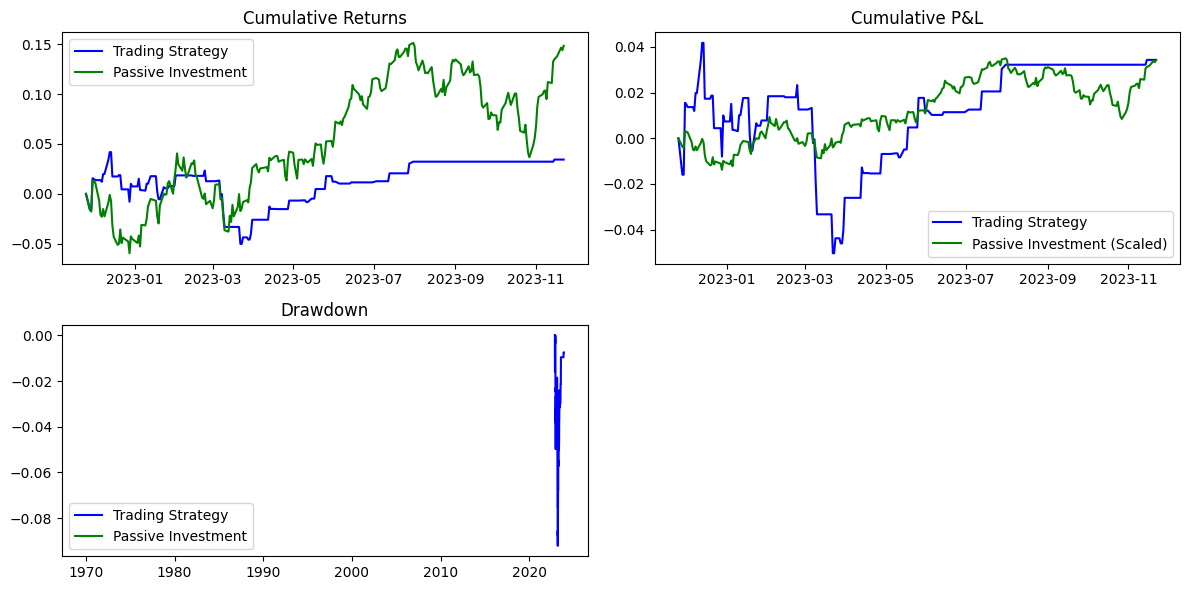

In [17]:
passive_returns = pd.DataFrame(index=df.index)
passive_returns['Returns'] = df['Adj Close'].pct_change()
passive_returns['Cumulative_Returns'] = (1 + passive_returns['Returns']).cumprod() - 1

plt.figure(figsize=(12, 6))

# Cumulative Returns
plt.subplot(2, 2, 1)
plt.plot(trades['Cumulative_Profit'], label='Trading Strategy', color='blue')
plt.plot(passive_returns['Cumulative_Returns'], label='Passive Investment', color='green')
plt.title('Cumulative Returns')
plt.legend()

# Cumulative P&L
plt.subplot(2, 2, 2)
plt.plot(trades['PnL'], label='Trading Strategy', color='blue')
plt.plot(passive_returns['Cumulative_Returns'] * (trades['PnL'].iloc[-1] / passive_returns['Cumulative_Returns'].iloc[-1]),
         label='Passive Investment (Scaled)', color='green')
plt.title('Cumulative P&L')
plt.legend()

# Drawdown
plt.subplot(2, 2, 3)
plt.plot(trades['Drawdown'], label='Trading Strategy', color='blue')
plt.plot(0, label='Passive Investment', color='green') 
plt.title('Drawdown')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# same but for "SSS"
df = yf.download('SSS', period='1y')

x1_values = np.linspace(0.01, 0.3, 20)  
x2_values = np.linspace(0.02, 0.3, 20)  

best_params = {'x1': None, 'x2': None}
best_total_profit = float('-inf')


for x1 in x1_values:
    for x2 in x2_values:
        
        trades = implement_strategy(df_SSS, x1, x2)
        total_profit = trades['Cumulative_Profit'].iloc[-1]

        if total_profit > best_total_profit:
            best_total_profit = total_profit
            best_params['x1'] = x1
            best_params['x2'] = x2



print("Best Parameters:")
print("x1:", best_params['x1'])
print("x2:", best_params['x2'])

